<h1 style='font-size: 45px; color: crimson; font-family: French Script MT; font-weight: 600; text-align: center'>Analysis of Variance (ANOVA) | Comparing Group Differences</h1>

---

<h2 style='font-family: French Script MT; font-weight: 600; font-size: 30px; text-align: left'>1.0. Import Required Libraries</h2>

In [134]:
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro, levene, skew, kurtosis
from statsmodels.stats.multicomp import pairwise_tukeyhsd


pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 8) 
print("Libraries Loaded Successfully")

Libraries Loaded Successfully


<h2 style='font-family: French Script MT; font-weight: 600; font-size: 30px; text-align: left'>2.0. Load and Inspect Dataset</h2>

In [135]:
filepath = "./Datasets/Fertilizer Experiment.csv"
df = pd.read_csv(filepath)
display(df)

,Fertilizer,Light Exposure,Plant Height (cm),Leaf Area (cm²),...,Biomass (g),Flower Count (number),Seed Yield (g),Stomatal Conductance (mmol/m²/s)
0,Control,Full Sun,58.56,185.74,...,11.99,19.54,6.69,242.41
1,Organic,Full Shade,46.70,138.80,...,8.67,15.37,6.17,233.66
2,Control,Partial Shade,58.33,203.84,...,9.50,16.39,5.41,230.07
3,Control,Full Shade,42.73,140.47,...,10.35,12.45,4.26,154.25
4,Organic,Full Shade,41.82,129.78,...,10.55,15.14,4.64,200.54
...,...,...,...,...,...,...,...,...,...
115,Synthetic,Partial Shade,65.24,228.35,...,10.94,21.14,7.48,254.78
116,Organic,Partial Shade,63.56,179.53,...,10.47,16.11,6.17,234.22
117,Control,Partial Shade,62.75,180.21,...,12.41,17.99,6.18,278.97
118,Control,Full Shade,39.60,144.32,...,9.15,13.72,4.46,186.87


<h2 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>3.0: Dataset Informartion Overviews</h2>

In [79]:
df.shape

(120, 10)

In [80]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- Fertilizer
--------------- Light Exposure
--------------- Plant Height (cm)
--------------- Leaf Area (cm²)
--------------- Chlorophyll Content (SPAD units)
--------------- Root Length (cm)
--------------- Biomass (g)
--------------- Flower Count (number)
--------------- Seed Yield (g)
--------------- Stomatal Conductance (mmol/m²/s)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fertilizer                        120 non-null    object 
 1   Light Exposure                    120 non-null    object 
 2   Plant Height (cm)                 120 non-null    float64
 3   Leaf Area (cm²)                   120 non-null    float64
 4   Chlorophyll Content (SPAD units)  120 non-null    float64
 5   Root Length (cm)                  120 non-null    float64
 6   Biomass (g)                       120 non-null    float64
 7   Flower Count (number)             120 non-null    float64
 8   Seed Yield (g)                    120 non-null    float64
 9   Stomatal Conductance (mmol/m²/s)  120 non-null    float64
dtypes: float64(8), object(2)
memory usage: 9.5+ KB


<h4 style=' font-family: French Script MT; font-size: 25px; font-weight: 600'>3.2: Columns Profiling</h4>

In [32]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Fertilizer,object,0,120,3,"{'Control': 41, 'Synthetic': 40, 'Organic': 39}"
1,Light Exposure,object,0,120,3,"{'Full Shade': 44, 'Full Sun': 40, 'Partial Sh..."
2,Plant Height (cm),float64,0,120,120,"{58.56151388665052: 1, 46.696826238466286: 1, ..."
3,Leaf Area (cm²),float64,0,120,120,"{185.73856643236132: 1, 138.7980608962804: 1, ..."
4,Chlorophyll Content (SPAD units),float64,0,120,120,"{46.5196207922374: 1, 34.69363266870892: 1, 40..."
5,Root Length (cm),float64,0,120,120,"{24.31891050096943: 1, 17.6585349528435: 1, 26..."
6,Biomass (g),float64,0,120,120,"{11.994074041165357: 1, 8.667791843721698: 1, ..."
7,Flower Count (number),float64,0,120,120,"{19.53594616947752: 1, 15.366158832462084: 1, ..."
8,Seed Yield (g),float64,0,120,120,"{6.687959618540082: 1, 6.165373569255893: 1, 5..."
9,Stomatal Conductance (mmol/m²/s),float64,0,120,120,"{242.41380014645895: 1, 233.65862057163417: 1,..."


<h4 style='font-family: French Script MT;  font-size: 25px; font-weight: 600'>3.3: Exploring Invalid Entries Dtypes</h4>

In [83]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'
            else:
                results.at[column, dtype] = '-'
    return results

results = analyze_column_dtypes(df)
display(results)

,Other,Datetime,String,Numeric,Missing
Fertilizer,-,-,100.00%,-,-
Light Exposure,-,-,100.00%,-,-
Plant Height (cm),-,-,-,100.00%,-
Leaf Area (cm²),-,-,-,100.00%,-
Chlorophyll Content (SPAD units),-,-,-,100.00%,-
Root Length (cm),-,-,-,100.00%,-
Biomass (g),-,-,-,100.00%,-
Flower Count (number),-,-,-,100.00%,-
Seed Yield (g),-,-,-,100.00%,-
Stomatal Conductance (mmol/m²/s),-,-,-,100.00%,-


<h4 style=' font-family: French Script MT;  font-size: 25px;  font-weight: 600'>3.4: Handling Duplicates Values</h4>

In [85]:
def handling_duplicates(df):
    Duplicates = df.duplicated().sum()
    if Duplicates != 0:
        df.drop_duplicates(inplace=True)
        return 
        print(f'Dataset has {Duplicates} Duplicates and values was cleaned successifully')
    else:
        print('Dataset has no Duplictes values')
handling_duplicates(df)

Dataset has no Duplictes values


<h4 style='font-size: 25px; font-family: French Script MT; font-weight: 600'>3.5: Checking Missing Values</h4>

In [86]:
def missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Fertilizer,0,0.00
1,Light Exposure,0,0.00
2,Plant Height (cm),0,0.00
3,Leaf Area (cm²),0,0.00
4,Chlorophyll Content (SPAD units),0,0.00
5,Root Length (cm),0,0.00
6,Biomass (g),0,0.00
7,Flower Count (number),0,0.00
8,Seed Yield (g),0,0.00
9,Stomatal Conductance (mmol/m²/s),0,0.00


<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>3.6: Detection and Handling Outliers (Using the Interquartile Range (IQR) Method)</h3>

In [87]:
def detect_outliers_overall(df):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    outlier_counts = {}
    total_obs = df.shape[0]
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
        outlier_counts[col] = {
            'Outlier Count': count,
            'Total Observations': total_obs,
            'Proportion (%)': round((count / total_obs) * 100, 2)
        }
    
    result = pd.DataFrame.from_dict(outlier_counts, orient='index')
    summary_row = {
        'Outlier Count': result['Outlier Count'].sum(),
        'Total Observations': total_obs,
        'Proportion (%)': round((result['Outlier Count'].sum() / (total_obs * len(numeric_cols))) * 100, 2)
    }
    result.loc['Total'] = summary_row
    return result

overall_outliers = detect_outliers_overall(df)
display(overall_outliers)

,Outlier Count,Total Observations,Proportion (%)
Plant Height (cm),0,120,0.00
Leaf Area (cm²),1,120,0.83
Chlorophyll Content (SPAD units),1,120,0.83
Root Length (cm),1,120,0.83
Biomass (g),0,120,0.00
Flower Count (number),0,120,0.00
Seed Yield (g),1,120,0.83
Stomatal Conductance (mmol/m²/s),0,120,0.00
Total,4,120,0.42


In [88]:
def Outlier_detection_IQR(df: pd.DataFrame, group_col: str) -> pd.DataFrame:
    Variables = df.select_dtypes(include=['number']).columns.tolist()
    if group_col in Variables:
        Variables.remove(group_col)
    
    results = []
    for group, group_df in df.groupby(group_col):
        group_size = len(group_df)
        outlier_counts = {}
        for col in Variables:
            Q1 = group_df[col].quantile(0.25)
            Q3 = group_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outlier_count = ((group_df[col] < lower_bound) | (group_df[col] > upper_bound)).sum()
            outlier_counts[col] = outlier_count
        
        results.append({"Group": group, **outlier_counts, "Total Observations": group_size})
    outlier_df = pd.DataFrame(results)
    return outlier_df

Outliers = Outlier_detection_IQR(df, group_col='Fertilizer')
Outliers.T

,0,1,2
Group,Control,Organic,Synthetic
Plant Height (cm),0,0,0
Leaf Area (cm²),0,0,0
Chlorophyll Content (SPAD units),0,0,0
Root Length (cm),0,0,0
Biomass (g),0,0,0
Flower Count (number),0,0,0
Seed Yield (g),0,0,0
Stomatal Conductance (mmol/m²/s),0,0,0
Total Observations,41,39,40


<h1 style='font-family: French Script MT; font-size: 30px;  font-weight: 600''>4.0: Statistic Description of The Datasets</h1>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a **bird's-eye view** of the data, helping us understand the general distribution and characteristics of the values.

In [89]:
summary_stats = df.describe().T.reset_index(names='Variable')
summary_stats

,Variable,count,mean,std,...,25%,50%,75%,max
0,Plant Height (cm),120.00,60.58,14.93,...,46.82,60.18,69.33,95.14
1,Leaf Area (cm²),120.00,181.90,45.93,...,142.32,180.71,205.00,312.30
2,Chlorophyll Content (SPAD units),120.00,42.03,9.86,...,34.58,40.37,48.66,73.21
3,Root Length (cm),120.00,23.86,5.44,...,19.01,23.64,27.07,39.40
4,Biomass (g),120.00,11.97,2.89,...,9.63,11.45,13.87,19.61
5,Flower Count (number),120.00,18.18,4.43,...,14.80,17.64,21.08,30.03
6,Seed Yield (g),120.00,6.16,1.49,...,4.94,6.14,7.03,10.16
7,Stomatal Conductance (mmol/m²/s),120.00,241.68,55.74,...,192.69,240.25,276.74,383.45


In [36]:
summary_stats = df.describe(include='all').T.reset_index(names='Variable')
summary_stats

,Variable,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,Fertilizer,120,3,Control,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Light Exposure,120,3,Full Shade,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Plant Height (cm),120.000,NaN,NaN,NaN,60.575,14.930,35.887,46.817,60.183,69.332,95.143
3,Leaf Area (cm²),120.000,NaN,NaN,NaN,181.904,45.935,108.647,142.324,180.705,204.998,312.304
4,Chlorophyll Content (SPAD units),120.000,NaN,NaN,NaN,42.025,9.864,23.988,34.582,40.366,48.660,73.212
5,Root Length (cm),120.000,NaN,NaN,NaN,23.859,5.436,14.751,19.010,23.640,27.071,39.399
6,Biomass (g),120.000,NaN,NaN,NaN,11.969,2.886,7.230,9.630,11.455,13.869,19.614
7,Flower Count (number),120.000,NaN,NaN,NaN,18.184,4.428,10.574,14.798,17.644,21.082,30.027
8,Seed Yield (g),120.000,NaN,NaN,NaN,6.165,1.488,3.862,4.941,6.140,7.030,10.164
9,Stomatal Conductance (mmol/m²/s),120.000,NaN,NaN,NaN,241.683,55.736,148.685,192.689,240.246,276.737,383.448


<h4 style='font-family: French Script MT; font-size: 25px;  font-weight: 600'>4.1: Continuous Variables Summary Statics</h4>


In [90]:
def summary_statistics(df, group_col=None):
    results = []
    if group_col: grouped = df.groupby(group_col)
    else: grouped = [(None, df)]

    for group_name, group_df in grouped:
        for col in group_df.select_dtypes(include=[np.number]).columns:
            mean = group_df[col].mean()
            median = group_df[col].median()
            mode = group_df[col].mode().iloc[0] if not group_df[col].mode().empty else np.nan
            std_dev = group_df[col].std()
            variance = group_df[col].var()
            value_range = group_df[col].max() - group_df[col].min()
            skewness_val = skew(group_df[col], nan_policy='omit')  # Skewness
            kurtosis_val = kurtosis(group_df[col], nan_policy='omit')  # Kurtosis
    
            results.append({
                'Group': group_name if group_col else 'Overall',
                'Parameter': col,
                'Mean': mean,
                'Median': median,
                'Mode': mode,
                'Std. Deviation': std_dev,
                'Variance': variance,
                'Range': value_range,
                'Skewness': skewness_val,
                'Kurtosis': kurtosis_val
            })
    
        
    result_df = pd.DataFrame(results)
    return result_df

results = summary_statistics(df)
display(results)

,Group,Parameter,Mean,Median,...,Variance,Range,Skewness,Kurtosis
0,Overall,Plant Height (cm),60.58,60.18,...,222.90,59.26,0.37,-0.73
1,Overall,Leaf Area (cm²),181.90,180.71,...,2109.99,203.66,0.56,-0.32
2,Overall,Chlorophyll Content (SPAD units),42.03,40.37,...,97.29,49.22,0.59,-0.17
3,Overall,Root Length (cm),23.86,23.64,...,29.55,24.65,0.62,-0.22
4,Overall,Biomass (g),11.97,11.45,...,8.33,12.38,0.60,-0.48
5,Overall,Flower Count (number),18.18,17.64,...,19.60,19.45,0.62,-0.26
6,Overall,Seed Yield (g),6.16,6.14,...,2.21,6.30,0.50,-0.51
7,Overall,Stomatal Conductance (mmol/m²/s),241.68,240.25,...,3106.48,234.76,0.41,-0.58


<h4 style='font-family: French Script MT; font-size: 25px;  font-weight: 600'>4.2: Grouped Summary Statics I</h4>


In [92]:
results = summary_statistics(df, group_col='Fertilizer')
display(results.head(15))

,Group,Parameter,Mean,Median,...,Variance,Range,Skewness,Kurtosis
0,Control,Plant Height (cm),54.55,58.56,...,101.89,33.75,-0.35,-1.21
1,Control,Leaf Area (cm²),167.76,170.86,...,766.72,108.94,-0.33,-0.72
2,Control,Chlorophyll Content (SPAD units),39.76,38.28,...,51.34,24.42,0.35,-1.00
3,Control,Root Length (cm),21.97,22.09,...,13.98,14.22,-0.12,-1.06
4,Control,Biomass (g),10.91,11.20,...,2.81,6.73,0.10,-0.95
5,Control,Flower Count (number),17.13,16.90,...,9.54,12.18,0.26,-0.62
6,Control,Seed Yield (g),5.68,5.98,...,1.18,4.02,0.09,-0.92
7,Control,Stomatal Conductance (mmol/m²/s),221.38,228.13,...,1823.25,156.23,-0.03,-1.06
8,Organic,Plant Height (cm),65.61,63.56,...,283.18,53.32,0.32,-1.24
9,Organic,Leaf Area (cm²),194.26,181.28,...,2731.82,185.13,0.69,-0.70


<h4 style='font-family: French Script MT; font-size: 25px;  font-weight: 600'>4.3: Grouped Summary Statics II</h4>


In [94]:
def grouped_summary_stats(df, group):
    Metrics = df.select_dtypes(include=np.number).columns.tolist()
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df

results = grouped_summary_stats(df, group='Fertilizer')
results.T

,0,1,2,3,4,5
Fertilizer,Control,Organic,Synthetic,Grand Mean,SEM,%CV
Plant Height (cm),54.55 ± 1.58,65.61 ± 2.69,61.84 ± 2.42,60.58,1.36,24.65
Leaf Area (cm²),167.76 ± 4.32,194.26 ± 8.37,184.36 ± 8.09,181.90,4.19,25.25
Chlorophyll Content (SPAD units),39.76 ± 1.12,44.85 ± 1.77,41.60 ± 1.67,42.03,0.90,23.47
Root Length (cm),21.97 ± 0.58,25.15 ± 1.03,24.53 ± 0.86,23.86,0.50,22.78
Biomass (g),10.91 ± 0.26,12.56 ± 0.47,12.48 ± 0.56,11.97,0.26,24.12
Flower Count (number),17.13 ± 0.48,19.36 ± 0.82,18.12 ± 0.75,18.18,0.40,24.35
Seed Yield (g),5.68 ± 0.17,6.41 ± 0.26,6.43 ± 0.25,6.16,0.14,24.13
Stomatal Conductance (mmol/m²/s),221.38 ± 6.67,256.74 ± 9.06,247.81 ± 9.74,241.68,5.09,23.06


<H1 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>5.0: Visualize Group Differences</H1>

To gain more intuitive insights, let's explore the data distribution through visualizations. Visual tools like histograms, box plots, and scatter plots help us easily identify patterns, trends, and outliers in the data. These visuals provide a clear representation of how data is spread across variables, allowing for quicker interpretation and a deeper understanding of the dataset’s structure and relationships.

<h4 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>5.1:  Histograms | Frequency Distribution</h4>


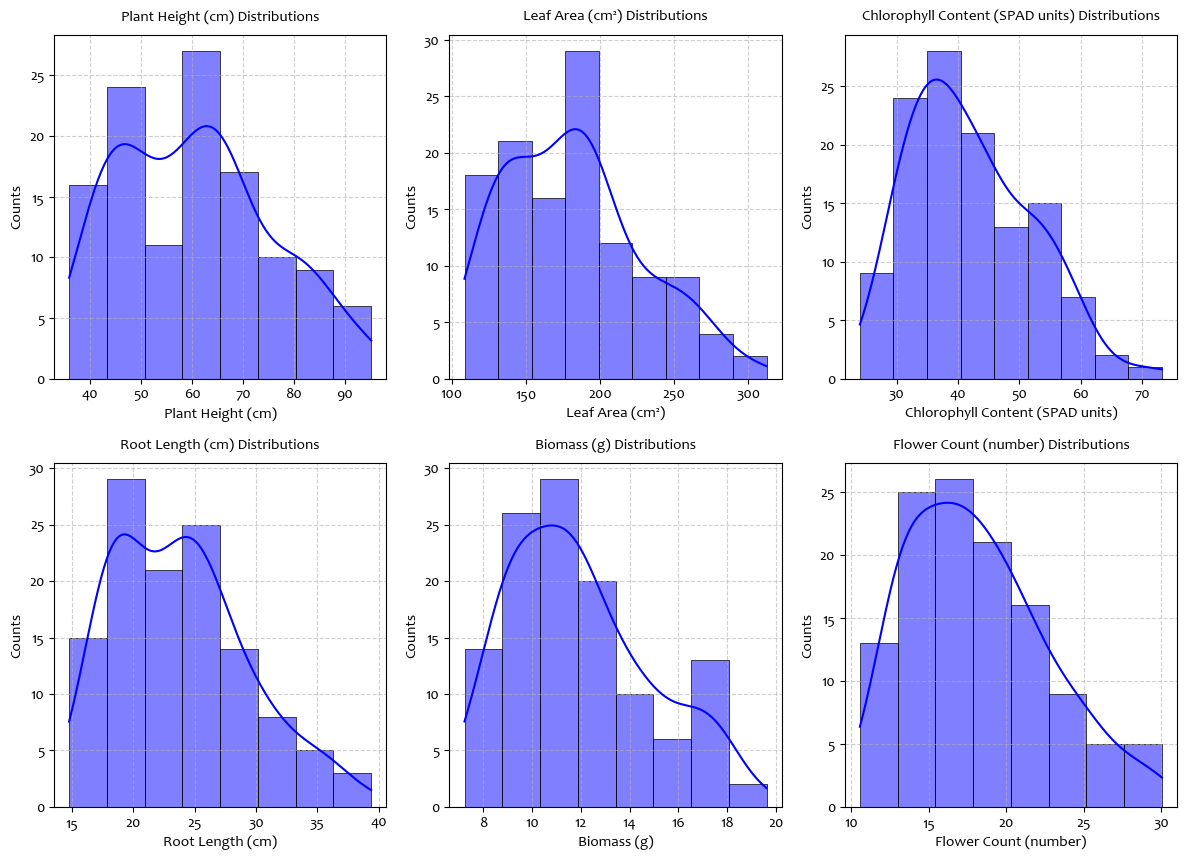

In [131]:
def hitoplot(df, Variables, group_col=None):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4.5* rows))
    plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.histplot(data=df, x=df[column], fill=True, hue=group_col, kde=True,  ax=axes[idx], linewidth=0.5, color='blue')
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10)
        if group_col: axes[idx].set_title(f"{column} Distributions Across {group_col}", fontsize=11, pad=10, fontweight='bold')
        
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].set_ylabel('Counts', fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Variables = df.select_dtypes(include=[np.number]).columns[:6]
hitoplot(df, Variables, group_col=None)

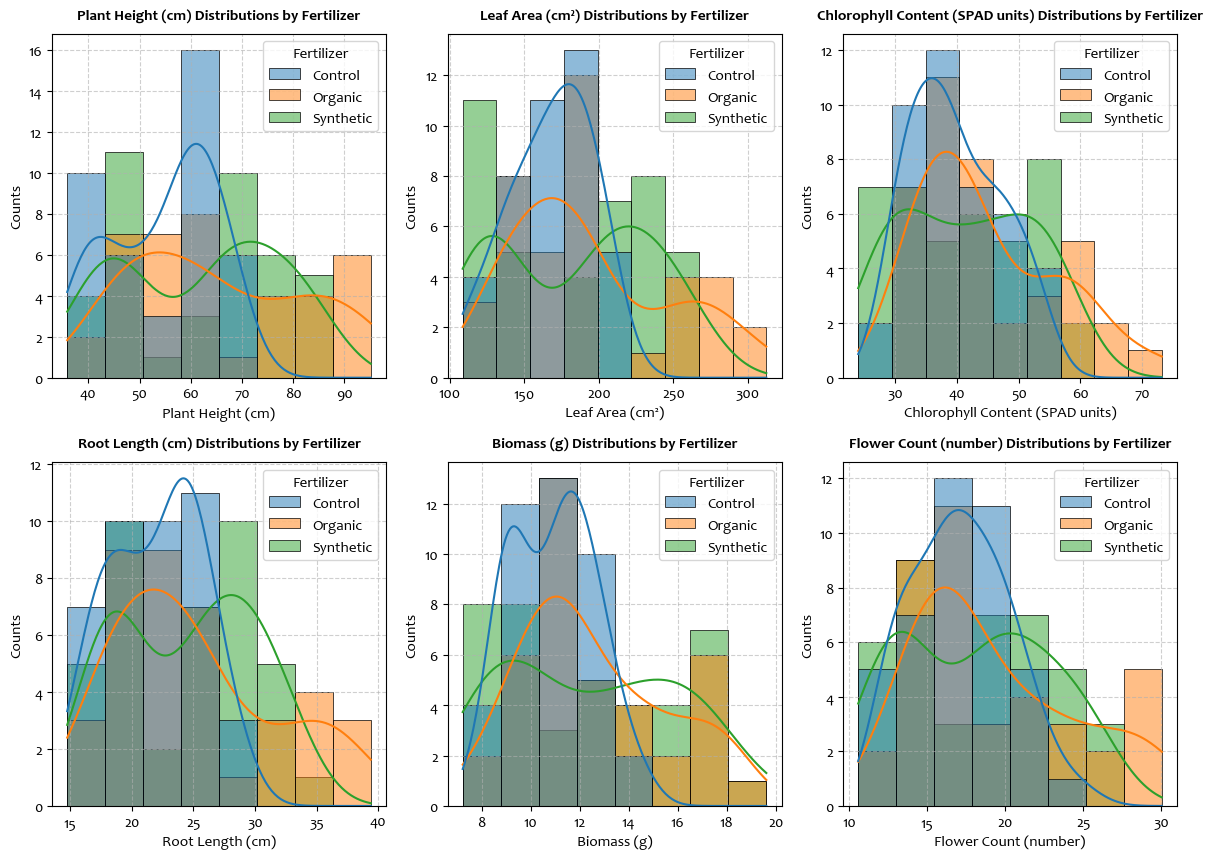

In [130]:
Variables = df.select_dtypes(include=[np.number]).columns[:6]
hitoplot(df, Variables, group_col='Fertilizer')

<h4 style='font-family: French Script MT;  font-size: 25px; font-weight: 600'>5.2:  Kernel Density Estimation (KDE) plots</h4>

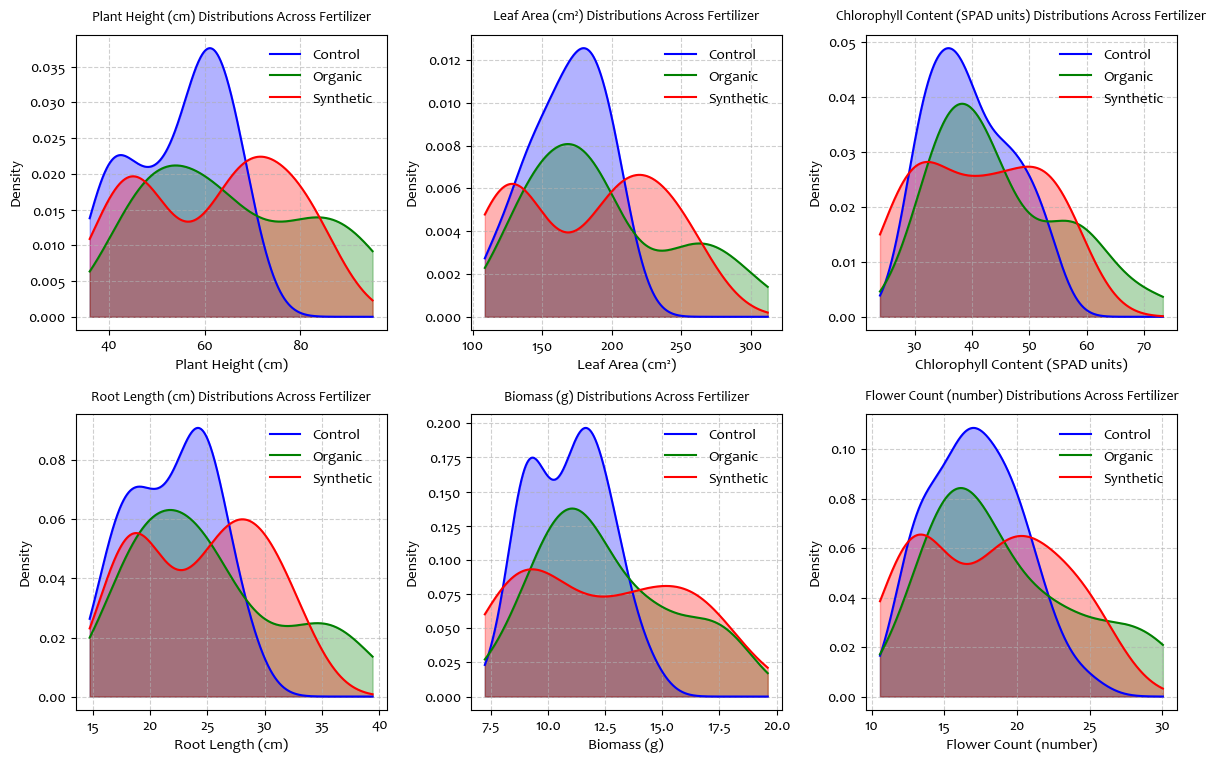

In [116]:
from scipy.stats import gaussian_kde

def plot_kdeplot(df, Variables, group_col=None):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4* rows))
    plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        categories = df[group_col].unique()
        colors = ['blue', 'green', 'red']
        x_range = np.linspace(df[column].min(), df[column].max(), 1000)
        for sp, color in zip(categories, colors):
            data = df[df[group_col] == sp][column]
            kde = gaussian_kde(data)
            axes[idx].plot(x_range, kde(x_range), label=sp, color=color)
            axes[idx].fill_between(x_range, kde(x_range), alpha=0.3, color=color)
        
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10)
        if group_col: axes[idx].set_title(f"{column} Distributions Across {group_col}", fontsize=10, pad=10)
        
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].set_ylabel('Density', fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
        axes[idx].legend(frameon=False)
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Variables = df.select_dtypes(include=[np.number]).columns[:6]
plot_kdeplot(df, Variables, group_col='Fertilizer')

<h4 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>5.3:  Barplot | Visual Comparisons</h4> 

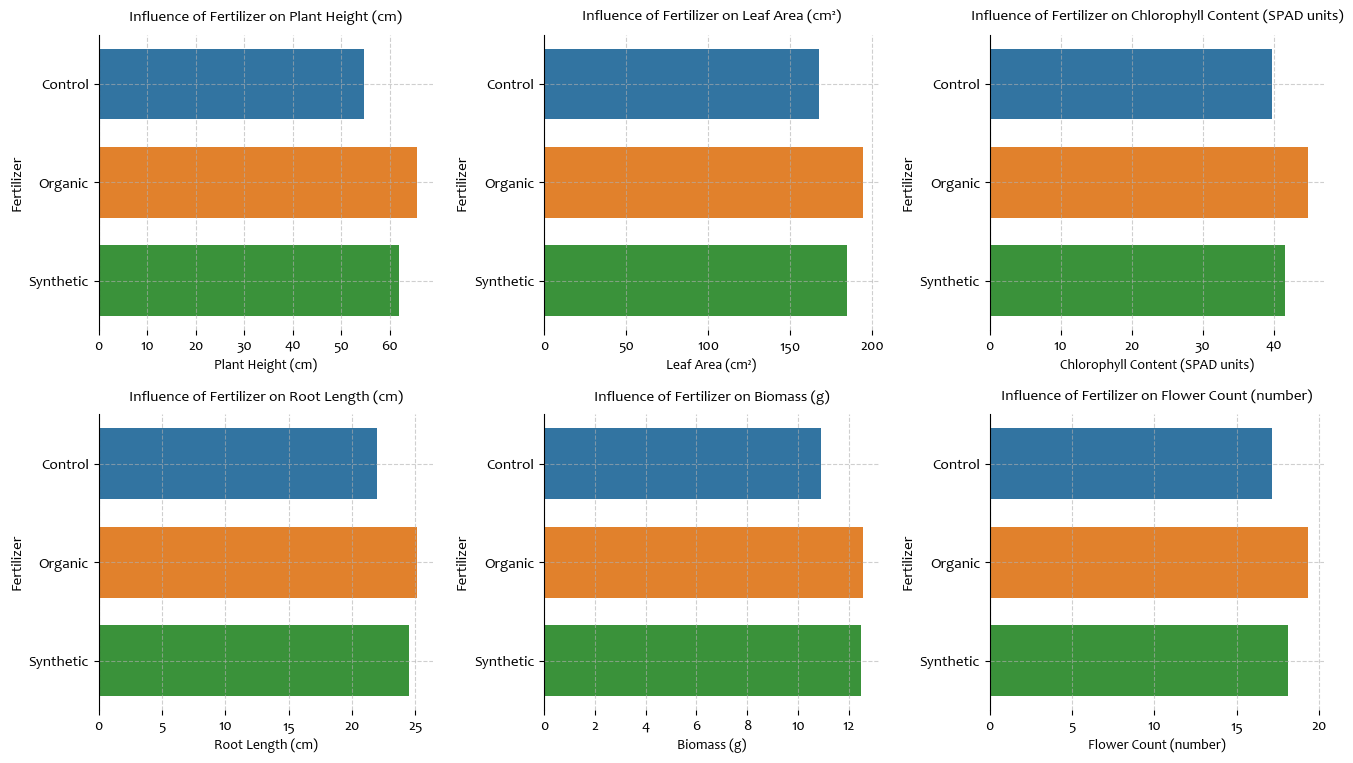

In [117]:
def plot_barplot(df, Variables, group_col):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4.5*cols, 4*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.barplot(data=df, x=df[column], y=df[group_col], 
                    fill=True, gap=0.1, ax=axes[idx], hue =group_col, linewidth=0.6, errorbar=None)   
        sns.despine(ax=axes[idx], right=True, bottom=True)
        axes[idx].set_title(f"Influence of {group_col} on {column}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=10)
        axes[idx].grid(linestyle='--', alpha=0.6)
        
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = df.select_dtypes(include=[np.number]).columns[:6]
plot_barplot(df, Variables, group_col='Fertilizer')

<h4 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>5.4:  Boxplot | Visual Comparisons</h4> 

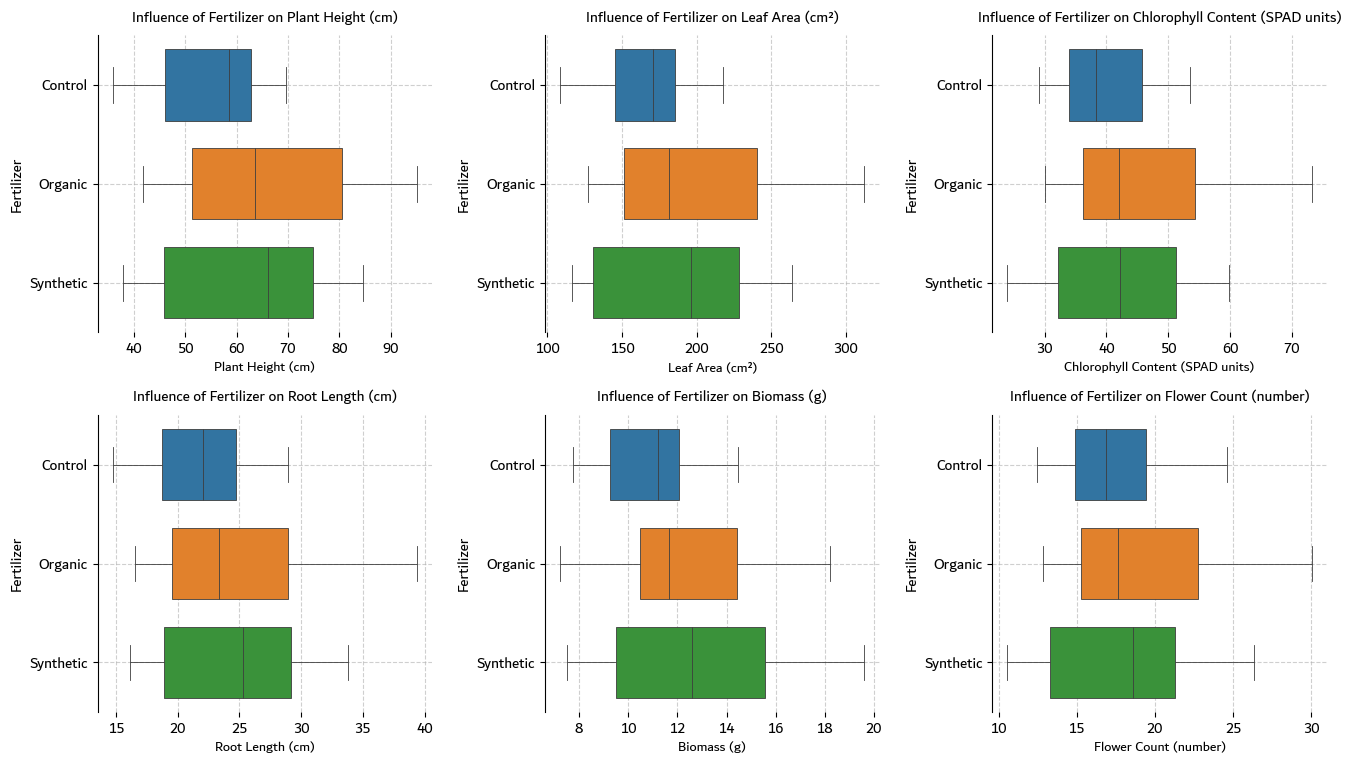

In [133]:
def plot_boxplot(df, Variables, group_col):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4.5*cols, 4*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.boxplot(data=df, x=df[column], y=df[group_col], fill=True, gap=0.1, ax=axes[idx], hue =group_col, linewidth=0.6)   
        sns.despine(ax=axes[idx], right=True, bottom=True)
        axes[idx].set_title(f"Influence of {group_col} on {column}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=10)
        axes[idx].grid(linestyle='--', alpha=0.6)
        
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = df.select_dtypes(include=[np.number]).columns[:6]
plot_boxplot(df, Variables, group_col='Fertilizer')

<h1 style='font-family: French Script MT; font-size: 30px;  font-weight: 600'>6.0: ANOVA Assumptions Validations</h1>

<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>6.1: Homogeneity of Variance (Levene's Test)</h3>

In [42]:
def Levene_test(df, group_cols, numeric_cols=None): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        for g in group_cols:
            if g in numeric_cols:
                numeric_cols.remove(g)
    
    results = []
    for group_col in group_cols:
        for col in numeric_cols:
            grouped_data = [g[col].dropna().values for _, g in df.groupby(group_col)]
            if all(len(g) > 1 for g in grouped_data):  # Ensure each group has enough data
                levene_stat, levene_p = levene(*grouped_data)
                interpretation = 'Homogeneous' if levene_p > 0.05 else 'Not Homogeneous'
                
            else:
                levene_stat, levene_p, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Group Column': group_col,
                'Variable': col,
                'Test Statistic': levene_stat,
                'P-Value': levene_p,
                'Interpretation': interpretation
            })
    
    return pd.DataFrame(results)

result_df = Levene_test(df, group_cols=['Fertilizer'])
display(result_df)

,Group Column,Variable,Test Statistic,P-Value,Interpretation
0,Fertilizer,Plant Height (cm),5.403,0.006,Not Homogeneous
1,Fertilizer,Leaf Area (cm²),7.774,0.001,Not Homogeneous
2,Fertilizer,Chlorophyll Content (SPAD units),3.918,0.023,Not Homogeneous
3,Fertilizer,Root Length (cm),4.071,0.020,Not Homogeneous
4,Fertilizer,Biomass (g),11.775,0.000,Not Homogeneous
5,Fertilizer,Flower Count (number),4.620,0.012,Not Homogeneous
6,Fertilizer,Seed Yield (g),3.205,0.044,Not Homogeneous
7,Fertilizer,Stomatal Conductance (mmol/m²/s),2.583,0.080,Homogeneous


<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>6.2: Normality Test for Variables Samples (Shapiro Wilk Test)</h3>

In [43]:
def bootstrapping(df, column, num_samples=1000, sample_size=30):
    sample_means = []
    for _ in range(num_samples):
        sample = df[column].dropna().sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())
    return sample_means

def shapiro_wilk_test(df, group_col, numeric_cols=None, use_bootstrap=True, num_samples=1000, sample_size=30): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        if group_col in numeric_cols:
            numeric_cols.remove(group_col)
    
    results = []
    for group, group_df in df.groupby(group_col):
        for col in numeric_cols:
            if use_bootstrap:
                data = bootstrapping(group_df, col, num_samples=num_samples, sample_size=sample_size)
            else:
                data = group_df[col].dropna()
                
            if len(data) >= 3:  # Shapiro requires at least 3 values
                stat, p_value = shapiro(data)
                interpretation = 'Normal' if p_value > 0.05 else 'Not Normal'
            else:
                stat, p_value, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Main-Group': group_col,
                'Group': group,
                'Variable': col,
                'Test Statistic': stat,
                'P-Value': p_value,
                'Interpretation': interpretation,
                'Used Bootstrap': use_bootstrap
            })
        
    results_df = pd.DataFrame(results)
    return results_df

result_df = shapiro_wilk_test(df, group_col='Fertilizer', use_bootstrap=True)
display(result_df)

,Main-Group,Group,Variable,Test Statistic,P-Value,Interpretation,Used Bootstrap
0,Fertilizer,Control,Plant Height (cm),0.999,0.845,Normal,True
1,Fertilizer,Control,Leaf Area (cm²),0.998,0.177,Normal,True
2,Fertilizer,Control,Chlorophyll Content (SPAD units),0.998,0.294,Normal,True
3,Fertilizer,Control,Root Length (cm),0.999,0.937,Normal,True
4,Fertilizer,Control,Biomass (g),0.998,0.168,Normal,True
5,Fertilizer,Control,Flower Count (number),0.998,0.298,Normal,True
6,Fertilizer,Control,Seed Yield (g),0.998,0.179,Normal,True
7,Fertilizer,Control,Stomatal Conductance (mmol/m²/s),0.999,0.848,Normal,True
8,Fertilizer,Organic,Plant Height (cm),0.999,0.637,Normal,True
9,Fertilizer,Organic,Leaf Area (cm²),0.997,0.062,Normal,True


<h1 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>7.0: Analysis of Varience (ANOVA)</h1>

<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>7.1: One Way  Analysis of Varience</h3>

In [136]:
def rename(text): return re.sub(r'[^a-zA-Z]', "", text)
    
def One_way_anova(data, Metrics, group_cols):
    results = []
    original_group_cols = group_cols[:]  # Save original names for reporting
    group_cols = [rename(col) for col in group_cols]
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    for original_group, group in zip(original_group_cols, group_cols):
        for col in Metrics:
            column_name = rename(col)  
            formula = f"{column_name} ~ C({group})" 
            model = smf.ols(formula, data=data).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            
            for source, row in anova_table.iterrows():
                p_value = row["PR(>F)"]
                interpretation = "Significant" if p_value < 0.05 else "No significant"
                if source == "Residual":
                    interpretation = "-"
                
                results.append({
                    "Variable": col,
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Interpretation": interpretation
                })

    return pd.DataFrame(results)

group_cols = ['Fertilizer']
Metrics = df.select_dtypes(include=[np.number]).columns.tolist()
Anova_results = One_way_anova(df, Metrics, group_cols)
Anova_results

,Variable,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,Plant Height (cm),C(Fertilizer),2540.40,2.00,6.20,0.00,Significant
1,Plant Height (cm),Residual,23984.47,117.00,NaN,NaN,-
2,Leaf Area (cm²),C(Fertilizer),14394.90,2.00,3.56,0.03,Significant
3,Leaf Area (cm²),Residual,236693.54,117.00,NaN,NaN,-
4,Chlorophyll Content (SPAD units),C(Fertilizer),529.81,2.00,2.81,0.06,No significant
5,Chlorophyll Content (SPAD units),Residual,11047.89,117.00,NaN,NaN,-
6,Root Length (cm),C(Fertilizer),229.57,2.00,4.09,0.02,Significant
7,Root Length (cm),Residual,3286.71,117.00,NaN,NaN,-
8,Biomass (g),C(Fertilizer),70.05,2.00,4.45,0.01,Significant
9,Biomass (g),Residual,921.36,117.00,NaN,NaN,-


<h3 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>7.2: Two Way  Analysis of Varience</h3>

In [46]:
def clean_column_name(name): return re.sub(r'[^a-zA-Z]', '', name)

def compute_two_way_anova(df, numeric_vars, group1, group2):
    results = []

    df = df.rename(columns={col: clean_column_name(col) for col in df.columns})
    group1_clean = clean_column_name(group1)
    group2_clean = clean_column_name(group2)

    for var in numeric_vars:
        var_clean = clean_column_name(var)
        formula = f"{var_clean} ~ C({group1_clean}) * C({group2_clean})"

        try:
            model = smf.ols(formula, data=df).fit()
            anova_table = anova_lm(model, typ=2)
            for source, row in anova_table.iterrows():
                p_val = row["PR(>F)"]
                interpretation = "Significant" if p_val < 0.05 else "Not Significant"
                if source == "Residual":
                    interpretation = "-"

                results.append({
                    "Variable": var,
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_val,
                    "Significant (α<0.05)": interpretation
                })
        
        except Exception as e:
            print(f"ANOVA failed for variable '{var}': {e}")
    results = pd.DataFrame(results)
    return results.fillna(' ')

numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
anova_results = compute_two_way_anova(df, numeric_vars, group1 = 'Fertilizer', group2='Light Exposure')
display(anova_results)

,Variable,Source,Sum Sq,df,F-Value,p-Value,Significant (α<0.05)
0,Plant Height (cm),C(Fertilizer),3092.829,2.000,48.502,0.000,Significant
1,Plant Height (cm),C(LightExposure),18697.924,2.000,293.223,0.000,Significant
2,Plant Height (cm),C(Fertilizer):C(LightExposure),1747.481,4.000,13.702,0.000,Significant
3,Plant Height (cm),Residual,3539.065,111.000,,,-
4,Leaf Area (cm²),C(Fertilizer),19516.698,2.000,35.591,0.000,Significant
5,Leaf Area (cm²),C(LightExposure),177708.337,2.000,324.076,0.000,Significant
6,Leaf Area (cm²),C(Fertilizer):C(LightExposure),28551.539,4.000,26.034,0.000,Significant
7,Leaf Area (cm²),Residual,30433.665,111.000,,,-
8,Chlorophyll Content (SPAD units),C(Fertilizer),772.907,2.000,18.855,0.000,Significant
9,Chlorophyll Content (SPAD units),C(LightExposure),7926.072,2.000,193.359,0.000,Significant


<h2 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>7.3: Model Residual Diagonistic</h2>

**Normality of Residual Using Shapiro Wilk Test**

In [64]:
def shapiro_wilk_test(dataframe, variables, group_column):
    if len(variables) == 0: raise ValueError("No numerical columns provided for testing.")
    
    renamed_columns = {col: rename(col) for col in dataframe.columns}
    dataframe = dataframe.rename(columns=renamed_columns)
    renamed_group_column = rename(group_column)

    test_results = []
    for original_col in variables:
        renamed_col = rename(original_col)
        formula = f"{renamed_col} ~ C({renamed_group_column})"
        model = smf.ols(formula, data=dataframe).fit()
        residuals = model.resid

        stat, p_value = shapiro(residuals)
        test_results.append({
            'Group': group_column,
            'Variable': original_col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })

    results_df = pd.DataFrame(test_results)
    return results_df

Variables = df.select_dtypes(include=[np.number]).columns
results = shapiro_wilk_test(df, Variables, group_column='Fertilizer')
display(results)

,Group,Variable,Statistic,P-Value,Normality
0,Fertilizer,Plant Height (cm),0.958,0.001,Not Normally Distributed
1,Fertilizer,Leaf Area (cm²),0.968,0.006,Not Normally Distributed
2,Fertilizer,Chlorophyll Content (SPAD units),0.964,0.003,Not Normally Distributed
3,Fertilizer,Root Length (cm),0.967,0.005,Not Normally Distributed
4,Fertilizer,Biomass (g),0.979,0.062,Normally Distributed
5,Fertilizer,Flower Count (number),0.962,0.002,Not Normally Distributed
6,Fertilizer,Seed Yield (g),0.969,0.007,Not Normally Distributed
7,Fertilizer,Stomatal Conductance (mmol/m²/s),0.970,0.008,Not Normally Distributed


**Normality of Residual Using Q-Q plot**

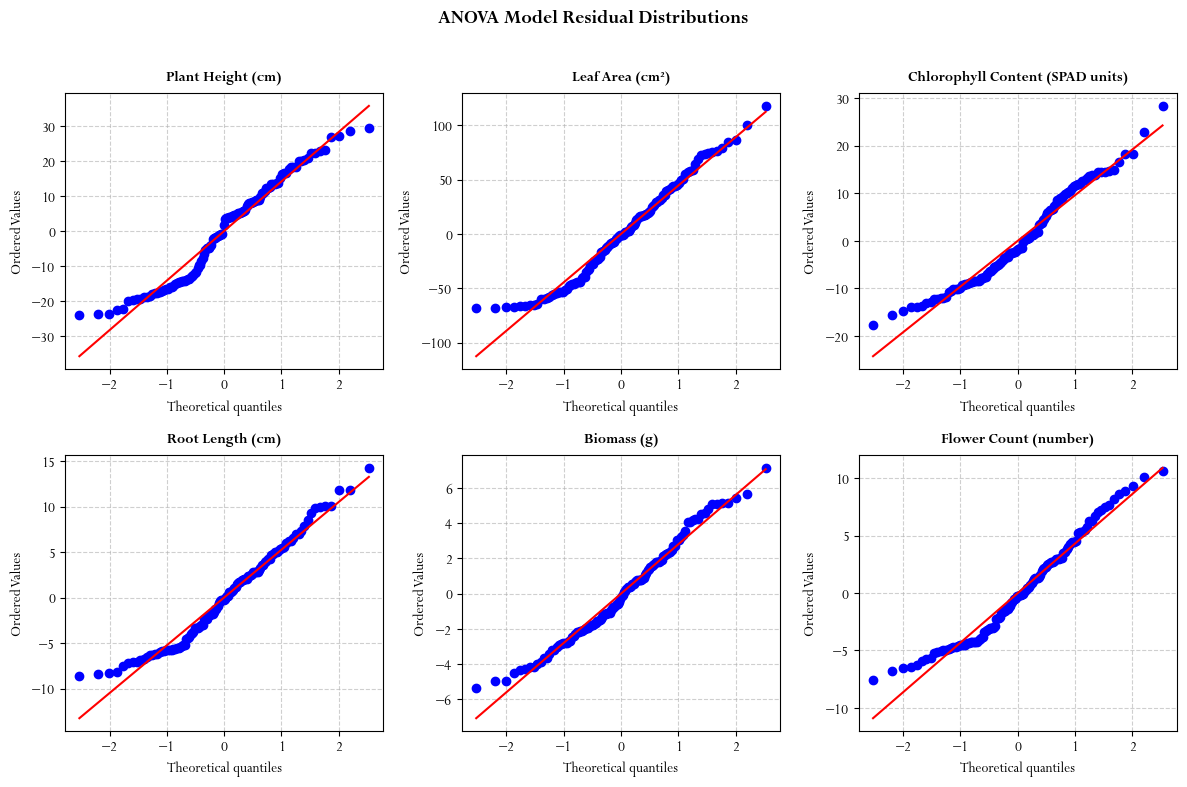

In [63]:
def residual_qqplot(data, Variables, group_col):
    renamed_group_col = rename(group_col)
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 3)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4* rows))
    plt.rcParams.update({'font.family': 'Perpetua', 'font.style': 'normal', 'font.size': 11 })
    fig.suptitle("ANOVA Model Residual Distributions", fontsize=14, fontweight='bold')
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        ax = axes[idx]
        column_name = rename(column)  
        formula = f"{column_name} ~ C({renamed_group_col})" 
        model = smf.ols(formula, data=data).fit()
        #sm. qqplot(model.resid, line='s', ax=ax)
        stats.probplot(model.resid, dist="norm", plot=ax)
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10, fontweight='bold')
        if group_col: axes[idx].set_title(f"{column}", fontsize=11, pad=10, fontweight='bold')
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)): fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Variables = df.select_dtypes(include=[np.number]).columns[:6]
residual_qqplot(df, Variables, group_col='Fertilizer')

<h1 style='font-family: French Script MT; font-size: 30px; font-weight: 600'>8.0: Post-Hoc Analysis</h1>

<h2 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>8.1: Tukey's Honest Significant Difference (THSD)</h2>

In [66]:
def Tukey_hsd(df, Variables, group=''):
    results_data = []
    for metric in Variables:
        turkey_results = pairwise_tukeyhsd(endog=df[metric], groups=df[group], alpha=0.05)
        results_table = turkey_results.summary()
        
        for i in range(1, len(results_table)):
            row = results_table.data[i]
            results_data.append({
                'Metric': metric,
                'Group1': row[0],
                'Group2': row[1],
                'Mean Diff.': row[2],
                'P-Value': row[3],
                'Lower CI': row[4],
                'Upper CI': row[5],
                'Reject Null': row[6]
            })
        
        result_df = pd.DataFrame(results_data)
    return result_df


Variables = df.select_dtypes(include=[np.number]).columns.tolist()
results = Tukey_hsd(df, Variables, group='Fertilizer')
pd.set_option("display.float_format", "{:.3f}".format)
results

,Metric,Group1,Group2,Mean Diff.,P-Value,Lower CI,Upper CI,Reject Null
0,Plant Height (cm),Control,Organic,11.060,0.002,3.458,18.663,True
1,Plant Height (cm),Control,Synthetic,7.283,0.061,-0.271,14.837,False
2,Plant Height (cm),Organic,Synthetic,-3.777,0.472,-11.426,3.872,False
3,Leaf Area (cm²),Control,Organic,26.497,0.026,2.614,50.380,True
4,Leaf Area (cm²),Control,Synthetic,16.602,0.225,-7.127,40.331,False
5,Leaf Area (cm²),Organic,Synthetic,-9.895,0.593,-33.923,14.133,False
6,Chlorophyll Content (SPAD units),Control,Organic,5.094,0.054,-0.065,10.254,False
7,Chlorophyll Content (SPAD units),Control,Synthetic,1.839,0.672,-3.287,6.966,False
8,Chlorophyll Content (SPAD units),Organic,Synthetic,-3.255,0.300,-8.446,1.936,False
9,Root Length (cm),Control,Organic,3.183,0.022,0.369,5.998,True


<h2 style='font-family: French Script MT; font-size: 25px; font-weight: 600'>8.2: Compact Letter Display (CLD) Table</h2>

In [137]:
from Scripts.compact_letter_table import compact_letter_table

results = compact_letter_table(df, group_column="Fertilizer")
display(results.T)

,Control,Organic,Synthetic,p-value
Plant Height (cm),54.55 ± 1.58 b,65.61 ± 2.69 a,61.84 ± 2.42 ab,0.0028**
Leaf Area (cm²),167.76 ± 4.32 b,194.26 ± 8.37 a,184.36 ± 8.09 ab,0.0316*
Chlorophyll Content (SPAD units),39.76 ± 1.12 a,44.85 ± 1.77 a,41.60 ± 1.67 a,0.0646ns
Root Length (cm),21.97 ± 0.58 b,25.15 ± 1.03 a,24.53 ± 0.86 ab,0.0193*
Biomass (g),10.91 ± 0.26 a,12.56 ± 0.47 b,12.48 ± 0.56 b,0.0137*
Flower Count (number),17.13 ± 0.48 a,19.36 ± 0.82 a,18.12 ± 0.75 a,0.0766ns
Seed Yield (g),5.68 ± 0.17 a,6.41 ± 0.26 a,6.43 ± 0.25 a,0.0339*
Stomatal Conductance (mmol/m²/s),221.38 ± 6.67 b,256.74 ± 9.06 a,247.81 ± 9.74 ab,0.0113*


<h1 style='font-size: 35px; color: red; font-family: French Script MT; font-weight: 700; text-align: center'>Data to Drive Meaningful Insights and Solutions</h1>